<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/MNIST_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 21. MNIST 손글시 데이터 인식하기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_file=open("/content/mnist_train_100.csv",'r')
data_list=data_file.readlines()
data_file.close()

In [ ]:
import numpy
import matplotlib.pyplot
%matplotlib inline

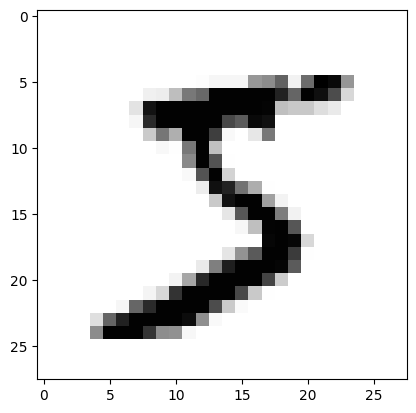

In [ ]:
all_values=data_list[0].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

In [ ]:
scaled_input=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [ ]:
# 만약 학습 데이터의 레이블이 5라면 우리는 결과 값 행렬을 만들 때
# 5에 상응하는 노드외에는 작은 값을 가지도록 행렬을 구성할 필요가 있습니다.

# 말하자면, [0,0,0,0,0,1,0,0,0,0]과 같이 말입니다.
# 활성화 함수가 도달할 수 없는 0과 1이라는 값을 사용하게 되면, 큰 값의 가중치를 통해
# 신경망이 포화된다는 사실을 배웠기 때문에, [0,0,0,0,0,1,0,0,0,0]: 이 값을 조금 조정할 필요가 있습니다.

# 0.01~0.99 범위를 적용하면 레이블 5에 대한 결과값: [0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]
# 이 될 것입니다.

# 출력 노드: 10
import numpy
onodes=10
target=numpy.zeros(onodes)
print('target값:',target)

target=target+0.01
print('target값:',target)

target[int(all_values[0])]=0.99
print('target값:',target)
# int(all_values[0]): MNIST 레코드의 1번째 원소를 취한 다음 int() 함수를 이용해 그 문자열을 정수로 변환.

target값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
target값: [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
target값: [0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [ ]:
all_values[0]

'5'

**3계층의 신경망으로 MNIST 데이터를 학습하는 코드**

In [ ]:
import numpy
import scipy.special
# 시그모이드함수 expit() 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.indoes=inputnodes
    self.hnodes=hiddennodes
    self.onodes=outputnodes

    # 가중치 행렬 wih와 who
    # w_i_j: 노드 i에서 다음 계층의 노드 j로 연결되는 배열 내 가중치
    self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.indoes))
    self.who=numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr=learningrate

    # 활성화함수
    self.activation_function=lambda x:scipy.special.expit(x)
    pass

  # 신경망 학습하기
  def train(self, input_list, targets_list):
    inputs=numpy.array(input_list, ndmin=2).T
    targets=numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)

    # 출력 계층의 오차: 실제값 - 계산 값
    output_errors=targets-final_outputs
    # 은닉 계층의 오차: 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors=numpy.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))

    pass

    # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs=numpy.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)
    return final_outputs

# 입력, 은릭, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10

# 학습률: 0.3
learning_rate=0.3

# 신경망의 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("/content/mnist_train_100.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  all_values=record.split(',')

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01

  # 결과 값 생성
  targets=numpy.zeros(output_nodes)+0.01 # 실제 값인 0.99 외에는 모두 0.01

  targets[int(all_values[0])]=0.99 # all_values[0]: 레코드에 해당하는 값.
  n.train(inputs, targets)
  pass
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.

**신경망 테스트하기**

In [ ]:
# 비록 100개라는 작은 레코드이기는 하지만, 우리는 신경망의 학습을 마쳤기 때문에 이제
# 신경망이 얼마나 잘 동작하는 지 테스트를 할 때입니다.
# 테스트: 두번째 데이터 모음인 테트 데이터를 대상으로 이루어집니다.

In [ ]:
# mnist 테스트 데이티인 csv파일을 리스트로 불러오기
test_data_file=open("/content/mnist_test_10.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

**테스트 데이터 모음의 1번째 레코드를 이용해 학습된 신경망에 질의하는 과정**

In [ ]:
all_values=test_data_list[0].split(',')
print(all_values[0])

7


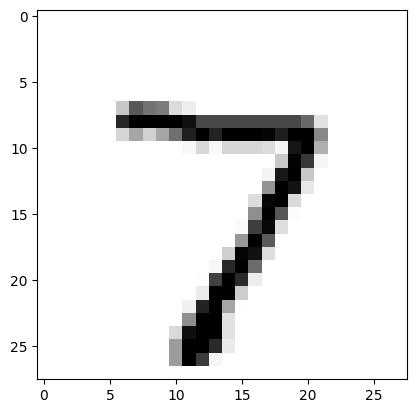

In [ ]:
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [ ]:
((numpy.asfarray(all_values[1:])/255.0* 0.99)+0.01)

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [ ]:
n.query((numpy.asfarray(all_values[1:])/255.0* 0.99)+0.01)
# 7이니까 : [0.89764196]
# 학습된 신경망에 우리가 질문한 것은 이미지에 적힌 숫자가 무엇이냐는 것입니다.

array([[0.04128038],
       [0.00163225],
       [0.02007066],
       [0.09077591],
       [0.10010104],
       [0.03843328],
       [0.00298631],
       [0.89764196],
       [0.061291  ],
       [0.03367623]])

**신경망 테스트**

In [ ]:
test_data_list[0] # 7을 나타내는 값.

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

In [ ]:
record=test_data_list[0]
all_values=record.split(',')
all_values[0]

'7'

In [ ]:
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  all_values=record.split(',')

  # 정답은 첫 번째 값
  coorect_label=int(all_values[0])
  print(coorect_label,"correct label")

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
# all_values의 1번째 값은 정답인 결과값, 손글씨로 유추되는 값
# 나머지 값들은 그것을 28*28의 크기로 그림을 나타내기 위해 필요한 픽셀 값. 그 값들의 범위 값 조정.

  # 신경망에 질의
  outputs=n.query(inputs)

  # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label=numpy.argmax(outputs)
  print(label, "network's answer")

  if (label == coorect_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

7 correct label
7 network's answer
2 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
1 network's answer
9 correct label
7 network's answer


In [ ]:
scorecard

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]

In [ ]:
len(scorecard)

10

In [ ]:
sum(scorecard)

6

In [ ]:
print('정답률', (sum(scorecard)/len(scorecard))*100, '%')

정답률 60.0 %


**정답의 비율인 성적을 계산해 출력**

In [ ]:
scorecard_array=numpy.asarray(scorecard)
print("performance", scorecard_array.sum()/scorecard_array.size)

performance 0.6


**전체 데이터를 이용해 학습 및 테스트 하기**

In [ ]:
len(test_data_list)

5206

In [ ]:
import numpy
import scipy.special
# 시그모이드함수 expit() 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.indoes=inputnodes
    self.hnodes=hiddennodes
    self.onodes=outputnodes

    # 가중치 행렬 wih와 who
    # w_i_j: 노드 i에서 다음 계층의 노드 j로 연결되는 배열 내 가중치
    self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.indoes))
    self.who=numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr=learningrate

    # 활성화함수
    self.activation_function=lambda x:scipy.special.expit(x)
    pass

  # 신경망 학습하기
  def train(self, input_list, targets_list):
    inputs=numpy.array(input_list, ndmin=2).T
    targets=numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)

    # 출력 계층의 오차: 실제값 - 계산 값
    output_errors=targets-final_outputs
    # 은닉 계층의 오차: 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors=numpy.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))

    pass

    # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs=numpy.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)
    return final_outputs

# 입력, 은릭, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10

# 학습률: 0.3
learning_rate=0.3

# 신경망의 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("/content/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  all_values=record.split(',')

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01

  # 결과 값 생성
  targets=numpy.zeros(output_nodes)+0.01 # 실제 값인 0.99 외에는 모두 0.01

  targets[int(all_values[0])]=0.99 # all_values[0]: 레코드에 해당하는 값.
  n.train(inputs, targets)
  pass
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.

In [ ]:
# mnist 테스트 데이티인 csv파일을 리스트로 불러오기
test_data_file=open("/content/mnist_test.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

In [ ]:
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  all_values=record.split(',')

  # 정답은 첫 번째 값
  coorect_label=int(all_values[0])
  print(coorect_label,"correct label")

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
# all_values의 1번째 값은 정답인 결과값, 손글씨로 유추되는 값
# 나머지 값들은 그것을 28*28의 크기로 그림을 나타내기 위해 필요한 픽셀 값. 그 값들의 범위 값 조정.

  # 신경망에 질의
  outputs=n.query(inputs)

  # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label=numpy.argmax(outputs)
  print(label, "network's answer")

  if (label == coorect_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8 correct label
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
0 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 n

In [ ]:
print('정답률', (sum(scorecard)/len(scorecard))*100, '%')

정답률 94.39999999999999 %


**learning rate 조절:0.3->0.01**

In [ ]:
import numpy
import scipy.special
# 시그모이드함수 expit() 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.indoes=inputnodes
    self.hnodes=hiddennodes
    self.onodes=outputnodes

    # 가중치 행렬 wih와 who
    # w_i_j: 노드 i에서 다음 계층의 노드 j로 연결되는 배열 내 가중치
    self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.indoes))
    self.who=numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr=learningrate

    # 활성화함수
    self.activation_function=lambda x:scipy.special.expit(x)
    pass

  # 신경망 학습하기
  def train(self, input_list, targets_list):
    inputs=numpy.array(input_list, ndmin=2).T
    targets=numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)

    # 출력 계층의 오차: 실제값 - 계산 값
    output_errors=targets-final_outputs
    # 은닉 계층의 오차: 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors=numpy.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))

    pass

    # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs=numpy.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)
    return final_outputs

# 입력, 은릭, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10

# 학습률: 0.01
learning_rate=0.01

# 신경망의 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("/content/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  all_values=record.split(',')

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01

  # 결과 값 생성
  targets=numpy.zeros(output_nodes)+0.01 # 실제 값인 0.99 외에는 모두 0.01

  targets[int(all_values[0])]=0.99 # all_values[0]: 레코드에 해당하는 값.
  n.train(inputs, targets)
  pass
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.

In [ ]:
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  all_values=record.split(',')

  # 정답은 첫 번째 값
  coorect_label=int(all_values[0])
  print(coorect_label,"correct label")

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
# all_values의 1번째 값은 정답인 결과값, 손글씨로 유추되는 값
# 나머지 값들은 그것을 28*28의 크기로 그림을 나타내기 위해 필요한 픽셀 값. 그 값들의 범위 값 조정.

  # 신경망에 질의
  outputs=n.query(inputs)

  # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label=numpy.argmax(outputs)
  print(label, "network's answer")

  if (label == coorect_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

print('정답률', (sum(scorecard)/len(scorecard))*100, '%')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer


In [ ]:
# 너무 작은 학습률을 취하는 것도 해가 될 수 있는 것 같습니다.
# 너무 작은 학습률은 경사 하강의 속도를 제한해 너무 작은 걸음을 걷는 셈이 되므로, 직관적으로 이해가 됩니다.

# 여러분이 코드를 실행하게 되면 그 결과 값이 필자가 한 것과는 조금 차이가 날 것이라는 사실입니다.
# 이는 전체 프로세스가 임의의 요소를 포함하기 때문입니다. 즉, 가중치가 임의의 값으로 초기화되므로 실행할 때마다
# 조금씩 다른 값을 가지게 됩니다. 이에 따라 경사 하강법에서도 다른 경로를 택하게 되기 때문입니다.

**hidden layer 조절:100->300**

In [ ]:
import numpy
import scipy.special
# 시그모이드함수 expit() 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.indoes=inputnodes
    self.hnodes=hiddennodes
    self.onodes=outputnodes

    # 가중치 행렬 wih와 who
    # w_i_j: 노드 i에서 다음 계층의 노드 j로 연결되는 배열 내 가중치
    self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.indoes))
    self.who=numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr=learningrate

    # 활성화함수
    self.activation_function=lambda x:scipy.special.expit(x)
    pass

  # 신경망 학습하기
  def train(self, input_list, targets_list):
    inputs=numpy.array(input_list, ndmin=2).T
    targets=numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)

    # 출력 계층의 오차: 실제값 - 계산 값
    output_errors=targets-final_outputs
    # 은닉 계층의 오차: 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors=numpy.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))

    pass

    # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs=numpy.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)
    return final_outputs

# 입력, 은릭, 출력 노드의 수
input_nodes=784
hidden_nodes=300
output_nodes=10

# 학습률: 0.3
learning_rate=0.3

# 신경망의 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("/content/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  all_values=record.split(',')

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01

  # 결과 값 생성
  targets=numpy.zeros(output_nodes)+0.01 # 실제 값인 0.99 외에는 모두 0.01

  targets[int(all_values[0])]=0.99 # all_values[0]: 레코드에 해당하는 값.
  n.train(inputs, targets)
  pass
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.

In [ ]:
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  all_values=record.split(',')

  # 정답은 첫 번째 값
  coorect_label=int(all_values[0])
  print(coorect_label,"correct label")

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
# all_values의 1번째 값은 정답인 결과값, 손글씨로 유추되는 값
# 나머지 값들은 그것을 28*28의 크기로 그림을 나타내기 위해 필요한 픽셀 값. 그 값들의 범위 값 조정.

  # 신경망에 질의
  outputs=n.query(inputs)

  # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label=numpy.argmax(outputs)
  print(label, "network's answer")

  if (label == coorect_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

print('정답률', (sum(scorecard)/len(scorecard))*100, '%')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer


**여러 번 수행을 통한 신경망의 개선: learning_rate:0.2, epoch:2 **

In [ ]:
# 이러한 반복 작업이 가치가 있는 이유는 경사 하강법에 의해 가중치의 값이 업데이트되는 과정에서 더많은 가능성을 제공해주기 때문.
import numpy
import scipy.special
# 시그모이드함수 expit() 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.indoes=inputnodes
    self.hnodes=hiddennodes
    self.onodes=outputnodes

    # 가중치 행렬 wih와 who
    # w_i_j: 노드 i에서 다음 계층의 노드 j로 연결되는 배열 내 가중치
    self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.indoes))
    self.who=numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr=learningrate

    # 활성화함수
    self.activation_function=lambda x:scipy.special.expit(x)
    pass

  # 신경망 학습하기
  def train(self, input_list, targets_list):
    inputs=numpy.array(input_list, ndmin=2).T
    targets=numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)

    # 출력 계층의 오차: 실제값 - 계산 값
    output_errors=targets-final_outputs
    # 은닉 계층의 오차: 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors=numpy.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))

    pass

    # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs=numpy.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)
    return final_outputs

# 입력, 은릭, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10

# 학습률: 0.2
learning_rate=0.2

# 신경망의 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("/content/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  all_values=record.split(',')

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01

  # 결과 값 생성
  targets=numpy.zeros(output_nodes)+0.01 # 실제 값인 0.99 외에는 모두 0.01

  targets[int(all_values[0])]=0.99 # all_values[0]: 레코드에 해당하는 값.
  n.train(inputs, targets)
  pass
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.

In [ ]:
epochs=2
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for e in range(epochs):
  for record in training_data_list:
    all_values=record.split(',')

    inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01

    # 결과값 생성(실제값인 0.99 외에는 모두 0.01)
    targets=numpy.zeros(output_nodes)+0.01

    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)
    pass
  pass

In [ ]:
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  all_values=record.split(',')

  # 정답은 첫 번째 값
  coorect_label=int(all_values[0])
  print(coorect_label,"correct label")

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
# all_values의 1번째 값은 정답인 결과값, 손글씨로 유추되는 값
# 나머지 값들은 그것을 28*28의 크기로 그림을 나타내기 위해 필요한 픽셀 값. 그 값들의 범위 값 조정.

  # 신경망에 질의
  outputs=n.query(inputs)

  # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label=numpy.argmax(outputs)
  print(label, "network's answer")

  if (label == coorect_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

print('정답률', (sum(scorecard)/len(scorecard))*100, '%')
# 일부는 너무 학습을 많이 하면 신경망이 학습 데이터에 오버피팅(과적합:overfitting)되어 이전에
# 보지 못한 신규 데이터에 대해서는 성능이 오히려 떨어지므로, 지나친 학습은 좋지 않다는 것을
# 이미 알고 있을 것입니다.

# 신경망의 학습 과정에는 본질적으로 임의의 요소가 들어가므로 예상치 못한 결과가 종종 발생합니다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 n

**learning rate:0.01, epoch:2**

In [ ]:
# 이러한 반복 작업이 가치가 있는 이유는 경사 하강법에 의해 가중치의 값이 업데이트되는 과정에서 더많은 가능성을 제공해주기 때문.
import numpy
import scipy.special
# 시그모이드함수 expit() 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.indoes=inputnodes
    self.hnodes=hiddennodes
    self.onodes=outputnodes

    # 가중치 행렬 wih와 who
    # w_i_j: 노드 i에서 다음 계층의 노드 j로 연결되는 배열 내 가중치
    self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.indoes))
    self.who=numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr=learningrate

    # 활성화함수
    self.activation_function=lambda x:scipy.special.expit(x)
    pass

  # 신경망 학습하기
  def train(self, input_list, targets_list):
    inputs=numpy.array(input_list, ndmin=2).T
    targets=numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)

    # 출력 계층의 오차: 실제값 - 계산 값
    output_errors=targets-final_outputs
    # 은닉 계층의 오차: 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors=numpy.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))

    pass

    # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs=numpy.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)
    return final_outputs

# 입력, 은릭, 출력 노드의 수
input_nodes=784
hidden_nodes=100
output_nodes=10

# 학습률: 0.01
learning_rate=0.01

# 신경망의 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("/content/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  all_values=record.split(',')

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01

  # 결과 값 생성
  targets=numpy.zeros(output_nodes)+0.01 # 실제 값인 0.99 외에는 모두 0.01

  targets[int(all_values[0])]=0.99 # all_values[0]: 레코드에 해당하는 값.
  n.train(inputs, targets)
  pass
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.

In [ ]:
epochs=2
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for e in range(epochs):
  for record in training_data_list:
    all_values=record.split(',')

    inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01

    # 결과값 생성(실제값인 0.99 외에는 모두 0.01)
    targets=numpy.zeros(output_nodes)+0.01

    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)
    pass
  pass

In [ ]:
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  all_values=record.split(',')

  # 정답은 첫 번째 값
  coorect_label=int(all_values[0])
  print(coorect_label,"correct label")

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
# all_values의 1번째 값은 정답인 결과값, 손글씨로 유추되는 값
# 나머지 값들은 그것을 28*28의 크기로 그림을 나타내기 위해 필요한 픽셀 값. 그 값들의 범위 값 조정.

  # 신경망에 질의
  outputs=n.query(inputs)

  # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label=numpy.argmax(outputs)
  print(label, "network's answer")

  if (label == coorect_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

print('정답률', (sum(scorecard)/len(scorecard))*100, '%')
# 직관적으로 생각해봐도 더 오랜 시간 경사 하강을 탐색하게 되면 한 걸음을 좀 더 작게(작은 학습률) 내딛더라도
# 전박적으로 보다 좋은 경로를 찾을 수 있다는 것이 이해가 됩니다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer


**learning_rate=0.01, hidden node: 300, epoch=5**

In [ ]:
# 이러한 반복 작업이 가치가 있는 이유는 경사 하강법에 의해 가중치의 값이 업데이트되는 과정에서 더많은 가능성을 제공해주기 때문.
import numpy
import scipy.special
# 시그모이드함수 expit() 사용을 위해 scipy.special 불러오기
import matplotlib.pyplot # 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    self.indoes=inputnodes
    self.hnodes=hiddennodes
    self.onodes=outputnodes

    # 가중치 행렬 wih와 who
    # w_i_j: 노드 i에서 다음 계층의 노드 j로 연결되는 배열 내 가중치
    self.wih=numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.indoes))
    self.who=numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr=learningrate

    # 활성화함수
    self.activation_function=lambda x:scipy.special.expit(x)
    pass

  # 신경망 학습하기
  def train(self, input_list, targets_list):
    inputs=numpy.array(input_list, ndmin=2).T
    targets=numpy.array(targets_list,ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)

    # 출력 계층의 오차: 실제값 - 계산 값
    output_errors=targets-final_outputs
    # 은닉 계층의 오차: 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors=numpy.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)), numpy.transpose(hidden_outputs))
    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)), numpy.transpose(inputs))

    pass

    # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs=numpy.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs=numpy.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs=self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs=numpy.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs=self.activation_function(final_inputs)
    return final_outputs

# 입력, 은릭, 출력 노드의 수
input_nodes=784
hidden_nodes=300
output_nodes=10

# 학습률: 0.01
learning_rate=0.01

# 신경망의 인스턴스 생성
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("/content/mnist_train.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
  all_values=record.split(',')

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01

  # 결과 값 생성
  targets=numpy.zeros(output_nodes)+0.01 # 실제 값인 0.99 외에는 모두 0.01

  targets[int(all_values[0])]=0.99 # all_values[0]: 레코드에 해당하는 값.
  n.train(inputs, targets)
  pass
# 신경망은 입력 값에서 어떤 특징 또는 패턴을 찾아냅니다.

In [ ]:
epochs=5
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for e in range(epochs):
  for record in training_data_list:
    all_values=record.split(',')

    inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01

    # 결과값 생성(실제값인 0.99 외에는 모두 0.01)
    targets=numpy.zeros(output_nodes)+0.01

    targets[int(all_values[0])]=0.99
    n.train(inputs, targets)
    pass
  pass

In [ ]:
scorecard=[]

# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
  all_values=record.split(',')

  # 정답은 첫 번째 값
  coorect_label=int(all_values[0])
  print(coorect_label,"correct label")

  # 입력 값의 범위와 값 조정
  inputs=(numpy.asfarray(all_values[1:])/255*0.99)+0.01
# all_values의 1번째 값은 정답인 결과값, 손글씨로 유추되는 값
# 나머지 값들은 그것을 28*28의 크기로 그림을 나타내기 위해 필요한 픽셀 값. 그 값들의 범위 값 조정.

  # 신경망에 질의
  outputs=n.query(inputs)

  # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
  label=numpy.argmax(outputs)
  print(label, "network's answer")

  if (label == coorect_label):
    scorecard.append(1)
  else:
    scorecard.append(0)
    pass
  pass

print('정답률', (sum(scorecard)/len(scorecard))*100, '%')
# 직관적으로 생각해봐도 더 오랜 시간 경사 하강을 탐색하게 되면 한 걸음을 좀 더 작게(작은 학습률) 내딛더라도
# 전박적으로 보다 좋은 경로를 찾을 수 있다는 것이 이해가 됩니다.

# 은닉 노드의 수를 늘려감에 따라 결과가 개선되기는 하지만, 급속도로 좋아지지는 않습니다. 은닉 노드가 늘어난다는 것은
# 직후 계층과 직전 계층에 있는 모든 노드들의 연결에 영향을 줌으로써, 수많은 연산이 추가적으로 필요하게 된다는 뜻이고,
# 따라서 신경망을 학습시키는 데, 소요되는 시간도 크게 늘어나게 됩니다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer


In [ ]:
learning_rate:0.01, epoch:1, hidden node=100
92.03%

learning_rate=0.3, epoch:1, hidden node=300
96.1

learing_rate=0.2, epoch:2, hidden node=100
95.67%

learning_rate=0.01, epoch:2, hidden node=100
94.58%

learning_rate=0.01, epoch:5, hidden node=300
96.56%

In [ ]:
!pip uninstall scipy
!pip install scipy==1.1.0

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.13.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.13.1
  Using cached scipy-1.1.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scipy
  Running setup.py clean for scipy
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run succe

In [ ]:
import scipy.misc
image_file_name=open("/content/1.png",'r')

# img_array=scipy.misc.imread(image_file_name, flatten=True)

import imageio
img_array=scipy.misc.imread(image_file_name), flatten=True)

img_data=255.0-img_array.reshpae(784)
img_data=(img_data/255.0*0.99)+0.01

# scip.ymisc.imread()함수: PNG, JPG 같은 이미지 파일로부터 데이터를 읽습니다.
# flatten=True 매개변수: 이미지를 실수의 배열로 변환합니다.

# "255-": 0은 검은색, 255은 흰색을 의미하지만, MNIST 데이터 모음은 이와 반대로 구성되어 있기 때문에.

<ipython-input-113-93ab85cd30a6>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array=imageio.imread(image_file_name)#, flatten=True)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('/content/1.png'):

    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])

    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.v3.imread(image_file_name, mode='F')

    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)

    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))

    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)

    pass

loading ...  /content/1.png
0.19903179
0.7480703


In [ ]:
# PNG파일 읽어오는 코드
# part3_load_own_images.ipynb

# 학습은 MNIST 학습 데이터 모음을 이용해 진행하지만, 테스트는 MNIST 테스트 세트가 아니라
# 우리가 직접 만든 이미지를 이용해 진행하므로, 이를 위한 프로그램을 작성해야 합니다.

**만든 학습데이터용**

In [ ]:
#https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork/blob/master/part3_neural_network_mnist_and_own_data.ipynb

In [ ]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# helper to load data from PNG image files
import imageio.v3
# glob helps select multiple files using patterns
import glob
# neural network class definition
class neuralNetwork:


    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate

        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)

        pass


    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass


    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
# load the mnist training data CSV file into a list
training_data_file = open("/content/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass
# our own image test data set
our_own_dataset = []

# load the png image data as test data set
for image_file_name in glob.glob('/content/1.png'):

    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])

    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.v3.imread(image_file_name, mode='F')

    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)

    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))

    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)

    pass

loading ...  /content/1.png
0.19903179
0.7480703


In [ ]:
# test the neural network with our own images

# record to test
item = 0

# plot image
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = our_own_dataset[item][0]
# data is remaining values
inputs = our_own_dataset[item][1:]

# query the network
outputs = n.query(inputs)
print (outputs)

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass